### 데이터를 담고 있는 그릇인 데이터 오브젝트는 크게 2가지로 구성.
>1) 시리즈: 1차원 배열로 데이터를 담고 있어 값을 리스트로 넘겨주어 생성 가능.

>2) 데이터프레임: 2차원 배열의 형태이며, 기본적으로 pd.DataFrame()으로 값을 넘겨주어 생성 가능
>> a) pd.DataFrame() 이용

>> b) 딕셔너리(dict)를 넣어주어 만들어 줄 수 있음.

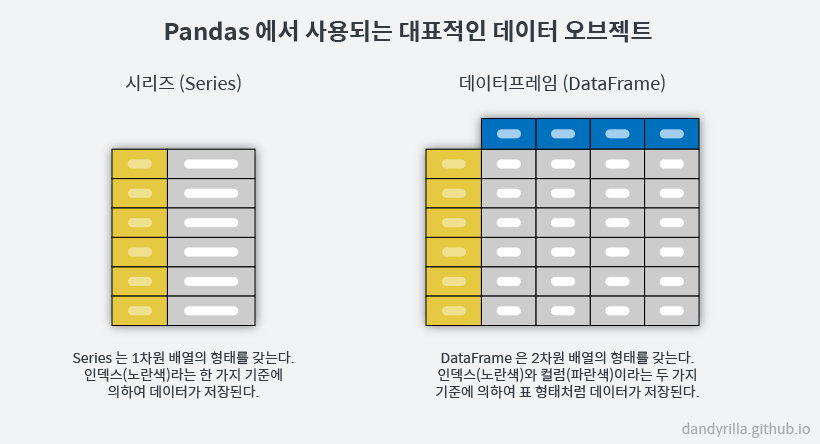

### 단일 시리즈 객체에서 구성하기
>1) DataFrame은 Series 객체의 집합체로서 열 하나짜리 DataFrame은 단일 Series로부터 구성 가능

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.Series([1, 2, 3, 4, 5])
print(test)

0    1
1    2
2    3
3    4
4    5
dtype: int64


### DataFrame 객체 구성하기
>1) 2차원 배열을 정렬된 1차원 열의 연속으로 볼 수 있듯이 DataFrame은 정렬된 Series 객체의 연속으로 볼 수 있음.

In [3]:
are_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170314}
area = pd.Series(are_dict)
print(area)

California    423967
Texas         695662
New York      141297
Florida       170314
dtype: int64


In [4]:
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860}
population = pd.Series(population_dict)

states = pd.DataFrame({'population': population, 'area': area})
print(states)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170314


In [5]:
## 데이터프레임인 경우, Code
## 1) pd.DataFrame() 이용
idx = 5
dates = pd.date_range('20220518', periods=idx)

## pd.DataFrame(데이터, 인덱스, 컬럼이름)
df = pd.DataFrame(np.random.randn(idx,4), index=dates, columns=list('1234'))
print(df)

                   1         2         3         4
2022-05-18 -0.766540 -1.387613 -0.717501  1.358657
2022-05-19  0.072495 -0.506934 -0.130433  0.568991
2022-05-20  0.104857 -1.416743  1.040521  0.288837
2022-05-21  0.337147 -0.989444 -0.912709 -0.253823
2022-05-22  1.206556 -0.084699  1.155022  2.652167


In [6]:
## 데이터프레임인 경우, Code
## 2) 딕셔너리(dict) 이용
df2 = pd.DataFrame({'1':'a',
                    '2': np.array([10]*5),
                    '3': 'c',
                    '4': 1                   
                   })
print(df2)
print()

## 딕셔너리 생성(keys + values) 및 list형태로 추출
dict_cur_price = {'Daum KAKAO': 80000, 'naver':800000, 'daeshin':30000}
stock_list = list(dict_cur_price.keys())
print('<keys 값 출력>:', stock_list)
print()

price_list = list(dict_cur_price.values())
print('<values 값 출력>:', price_list)
print()

df3 = pd.DataFrame([dict_cur_price])
print('<데이터프레임 출력>')
print(df3)

   1   2  3  4
0  a  10  c  1
1  a  10  c  1
2  a  10  c  1
3  a  10  c  1
4  a  10  c  1

<keys 값 출력>: ['Daum KAKAO', 'naver', 'daeshin']

<values 값 출력>: [80000, 800000, 30000]

<데이터프레임 출력>
   Daum KAKAO   naver  daeshin
0       80000  800000    30000


## Pandas 데이터 세로(컬럼)로 데이터 채우기 with for문

In [7]:
employees = ['김길동', '홍길동','김영수','이철수','김철희','김케빈']
salary = [300,400,500,300,400,300]
df = pd.DataFrame({"Employee":employees,"Salary":salary})
print(df)

  Employee  Salary
0      김길동     300
1      홍길동     400
2      김영수     500
3      이철수     300
4      김철희     400
5      김케빈     300


In [8]:
## 데이터를 저장할 list 생성.
status = []

## zip 함수를 이용하여 데이터프레임의 2개 컬럼 데이터 가져오기
for emp, money in zip(df['Employee'], df['Salary']):
    if emp == '김영수' and money > 450:
        # list에 추가하여 update
        status.append('Manager')
    else:
        status.append('Teams')
# 데이터프레임에 'Status' 컬럼 추가하여 list 데이터 집어넣기.
df['Status'] = status

print(df)

  Employee  Salary   Status
0      김길동     300    Teams
1      홍길동     400    Teams
2      김영수     500  Manager
3      이철수     300    Teams
4      김철희     400    Teams
5      김케빈     300    Teams


## dictionary 데이터 ==> 데이터프레임에 입력.
>1) keys: 데이터프레임 컬럼명

>2) values: 데이터프레임 컬럼값

In [13]:
my_dict = {'직급': ['대리', '과장', '차장', '차장', '부장', '이사'],
           '년차': [1, 2, 4, 3, 6, 7]
          }

print(my_dict.keys())
print(my_dict.values())
print(my_dict['년차'])

df_add = pd.DataFrame(my_dict)
print(df_add)

idx=[1,2,3,4,5,6]
col=['position', 'year']
pd.DataFrame(my_dict)

dict_keys(['직급', '년차'])
dict_values([['대리', '과장', '차장', '차장', '부장', '이사'], [1, 2, 4, 3, 6, 7]])
[1, 2, 4, 3, 6, 7]
   직급  년차
0  대리   1
1  과장   2
2  차장   4
3  차장   3
4  부장   6
5  이사   7


직급  년차
0  대리   1
1  과장   2
2  차장   4
3  차장   3
4  부장   6
5  이사   7